<a href="https://colab.research.google.com/github/yashikart/McDonalds-Case-Study/blob/main/market_seg_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd

In [146]:
data = pd.read_csv('/content/vacation_complete_dataset.csv')

In [147]:
data2 = data

In [148]:
data

,Gender,Age,Education,Income,Income2,Occupation,State,Relationship.Status,Obligation,Obligation2,...,entertainment facilities,not care about prices,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings
0,Female,25,6.0,"$30,001 to $60,000",30-60k,Clerical or service worker,VIC,single,4.800000,Q4,...,no,no,no,no,no,no,no,no,no,no
1,Female,31,8.0,"$120,001 to $150,000",>120k,professional,WA,married,3.300000,Q1,...,no,no,yes,no,no,no,no,no,no,yes
2,Male,21,3.0,"$90,001 to $120,000",90-120k,NaN,NSW,single,3.400000,Q2,...,no,yes,yes,no,yes,no,no,no,yes,no
3,Female,18,2.0,"$30,001 to $60,000",30-60k,unemployed,NSW,single,2.633333,Q1,...,yes,no,no,yes,no,no,no,no,no,yes
4,Male,61,3.0,"Less than $30,000",<30k,retired,WA,married,3.400000,Q2,...,no,no,yes,no,no,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,51,3.0,"$30,001 to $60,000",30-60k,manager or administrator,VIC,separated or divorced,2.366667,Q1,...,yes,no,yes,yes,no,yes,no,no,yes,yes
996,Male,58,4.0,"$60,001 to $90,000",60-90k,small business owner,WA,living with a partner,4.400000,Q4,...,no,no,yes,yes,no,yes,no,yes,yes,no
997,Male,41,8.0,"$60,001 to $90,000",60-90k,professional,QLD,married,3.866667,Q3,...,no,no,no,no,no,no,no,no,no,yes
998,Female,42,3.0,NaN,NaN,professional,VIC,living with a partner,4.000000,Q3,...,no,no,no,no,no,no,no,no,no,no


In [149]:
data.columns

Index(['Gender', 'Age', 'Education', 'Income', 'Income2', 'Occupation',
       'State', 'Relationship.Status', 'Obligation', 'Obligation2', 'NEP',
       'Vacation.Behaviour', 'rest and relax', 'luxury / be spoilt',
       'do sports', 'excitement, a challenge', 'not exceed planned budget',
       'realise creativity', 'fun and entertainment', 'good company',
       'health and beauty', 'free-and-easy-going', 'entertainment facilities',
       'not care about prices', 'life style of the local people',
       'intense experience of nature', 'cosiness/familiar atmosphere',
       'maintain unspoilt surroundings', 'everything organised',
       'unspoilt nature/natural landscape', 'cultural offers',
       'change of surroundings'],
      dtype='object')

In [150]:
data.shape

(1000, 32)

In [151]:
data['Gender'].value_counts()

Male      512
Female    488
Name: Gender, dtype: int64

In [152]:
data['Age'].describe()

count    1000.000000
mean       44.168000
std        14.539228
min        18.000000
25%        32.000000
50%        42.000000
75%        57.000000
max       105.000000
Name: Age, dtype: float64

In [153]:
data['Income'].value_counts()

$30,001 to $60,000      265
$60,001 to $90,000      233
Less than $30,000       150
$90,001 to $120,000     146
$120,001 to $150,000     72
$150,001 to $180,000     32
$180,001 to $210,000     15
more than $240,001       11
$210,001 to $240,000     10
Name: Income, dtype: int64

In [154]:
data['Income2'].value_counts()

30-60k     265
60-90k     233
<30k       150
90-120k    146
>120k      140
Name: Income2, dtype: int64

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

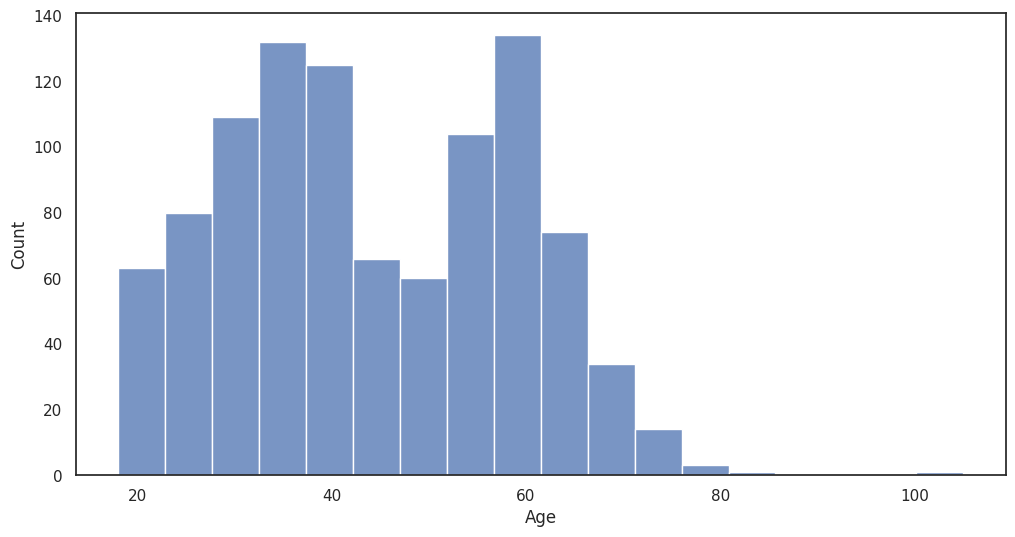

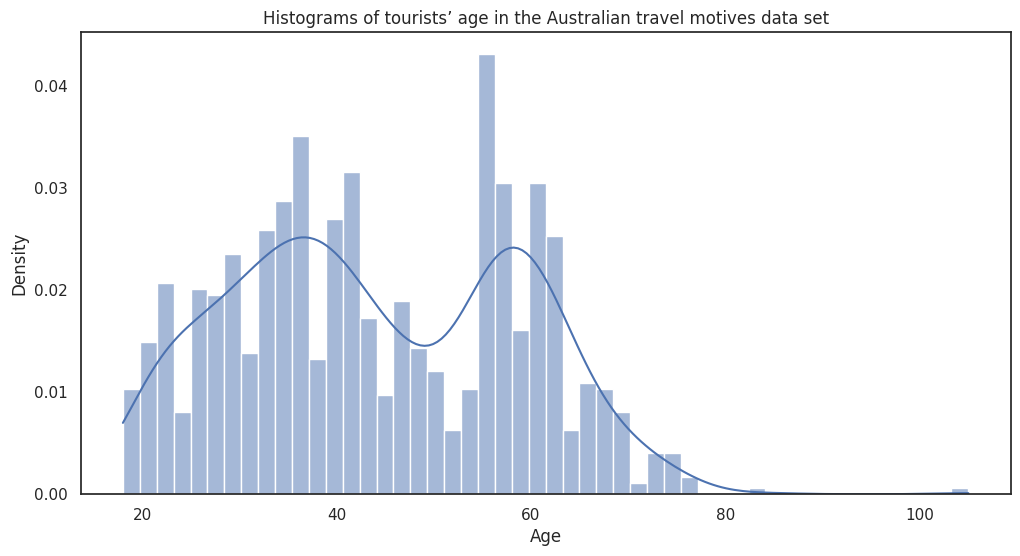

In [156]:
fig, axes = plt.subplots(figsize=(12,6))
sns.histplot(data['Age'])
fig, axes = plt.subplots(1, figsize=(12,6))
sns.histplot(data['Age'],bins=50, kde=True, stat='density')
plt.title('Histograms of tourists’ age in the Australian travel motives data set')
plt.show()

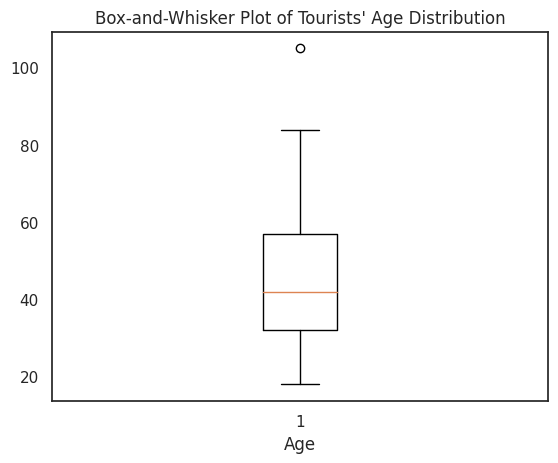

In [157]:
plt.boxplot(data['Age'])
plt.xlabel('Age')
plt.title('Box-and-Whisker Plot of Tourists\' Age Distribution')
plt.show()


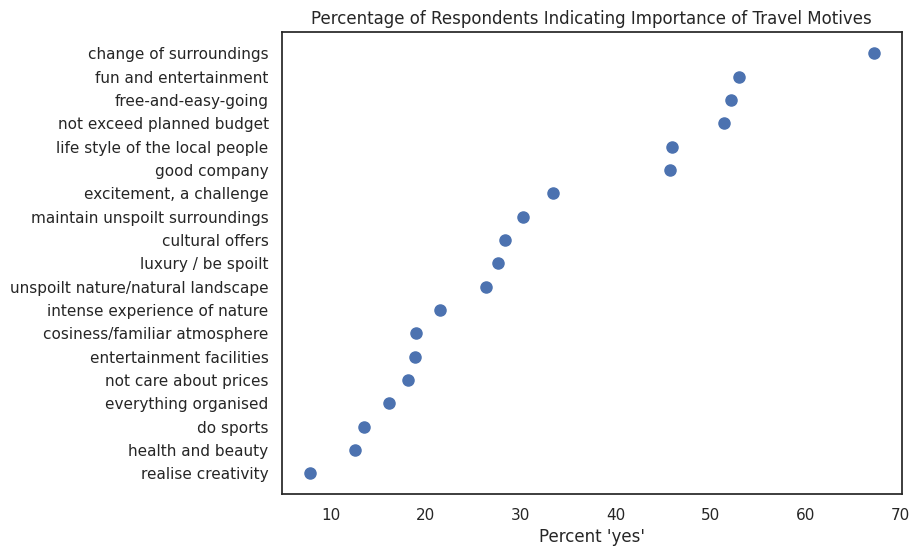

In [158]:

travel_motives = data.iloc[:, 13:32]
percentage_yes = (travel_motives == 'yes').mean() * 100

# Sort the percentages
sorted_percentages = percentage_yes.sort_values()

# Create a dot chart
plt.figure(figsize=(8, 6))
plt.plot(sorted_percentages, range(len(sorted_percentages)), 'o', markersize=8)

# Set plot labels
plt.xlabel("Percent 'yes'")
plt.yticks(range(len(sorted_percentages)), sorted_percentages.index)
plt.title('Percentage of Respondents Indicating Importance of Travel Motives')

# Show the plot
plt.show()


<Axes: ylabel='Income2'>

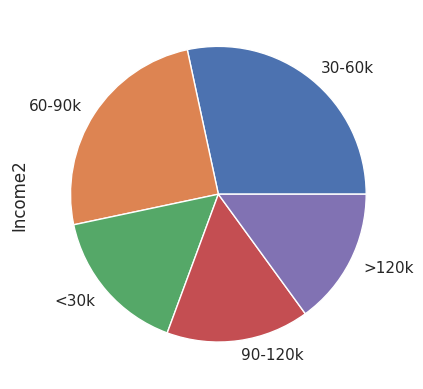

In [159]:
data['Income2'].value_counts().plot(kind='pie')

In [160]:
for i in data.iloc[:, 12:]:
  data[i] = data[i].apply(lambda x: 0 if x=='no' else 1)

data['Gender'] = data['Gender'].apply(lambda x: 0 if x=='Female' else 1)

In [161]:
data['Occupation'] = pd.Categorical(data['Occupation'])
data['Occupation'] = data['Occupation'].cat.codes

data['State'] = pd.Categorical(data['State'])
data['State'] = data['State'].cat.codes

data['Relationship.Status'] = pd.Categorical(data['Relationship.Status'])
data['Relationship.Status'] = data['Relationship.Status'].cat.codes

In [162]:
data.isnull().sum()

Gender                                0
Age                                   0
Education                             8
Income                               66
Income2                              66
Occupation                            0
State                                 0
Relationship.Status                   0
Obligation                            0
Obligation2                           0
NEP                                   0
Vacation.Behaviour                   25
rest and relax                        0
luxury / be spoilt                    0
do sports                             0
excitement, a challenge               0
not exceed planned budget             0
realise creativity                    0
fun and entertainment                 0
good company                          0
health and beauty                     0
free-and-easy-going                   0
entertainment facilities              0
not care about prices                 0
life style of the local people        0


In [163]:
data['Vacation.Behaviour'] = data['Vacation.Behaviour'].fillna(data['Vacation.Behaviour'].mean())

In [164]:
data['Education'] = data['Education'].fillna(0)

In [165]:
data['Income2'] = data['Income2'].fillna(0)

In [166]:
data['Income2'].unique()

array(['30-60k', '>120k', '90-120k', '<30k', '60-90k', 0], dtype=object)

In [167]:
category_mapping = { 0: 0, '<30k': 1, '30-60k': 2, '60-90k':3, '90-120k':4, '>120k':5}
data['Income2'] = data['Income2'].map(category_mapping)

In [168]:
data['Obligation2'] = pd.Categorical(data['Obligation2'])
data['Obligation2'] = data['Obligation2'].cat.codes

In [169]:
data = data.drop('Income', axis=1)

In [170]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)


PCA()

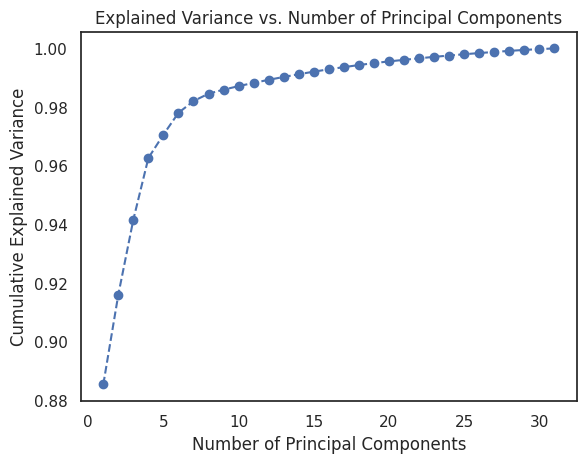

In [171]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.show()

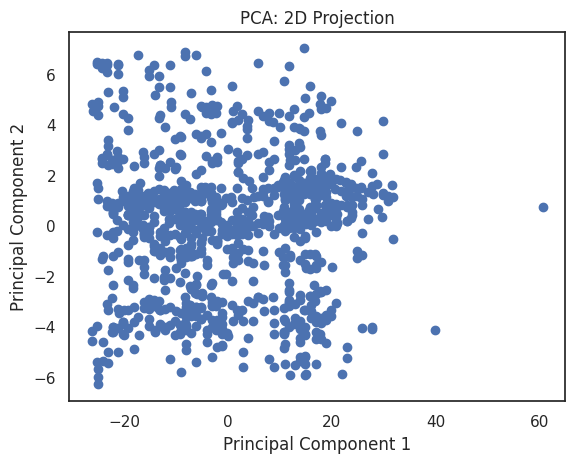

In [172]:
n_components = (cumulative_explained_variance <= 0.95).sum() + 1
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(data)
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Projection')
plt.show()

Explained Variance Ratio:
[0.17078897 0.09081401 0.07046054 0.06819256 0.05450082 0.05361201
 0.05278774 0.04489111 0.04406192 0.04169233 0.04021179 0.03982593
 0.03864189 0.03618819 0.03503456 0.03321271 0.03180739 0.02717633
 0.02609922]


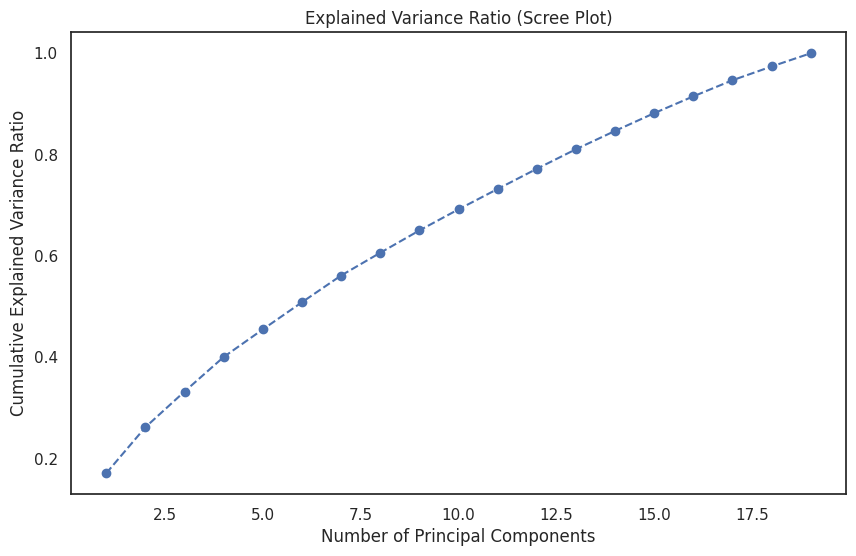

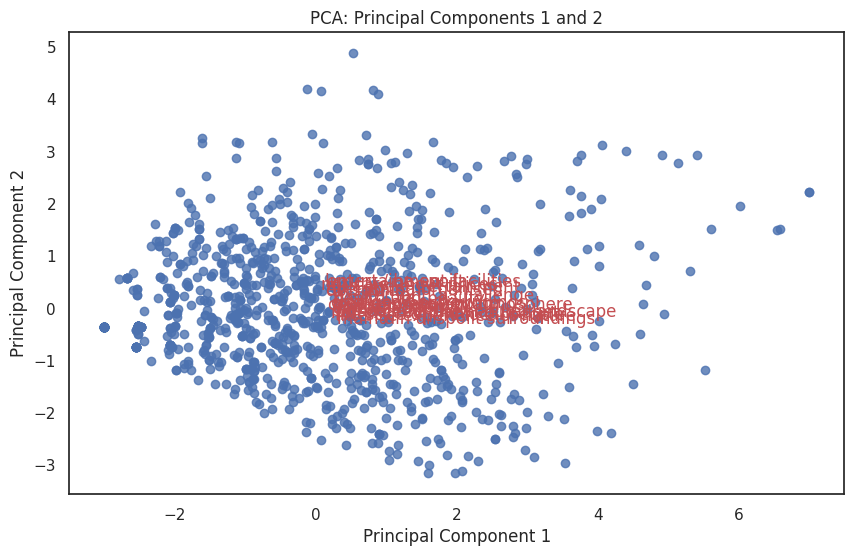

In [173]:
data_for_pca = data.iloc[:, 12:32]

# Standardize the data (optional but often recommended for PCA)
data_for_pca_standardized = (data_for_pca - data_for_pca.mean()) / data_for_pca.std()

# Fit PCA
pca = PCA()
principal_components = pca.fit_transform(data_for_pca_standardized)

# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plotting the Scree Plot (explained variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio (Scree Plot)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# Plotting the data in 2D using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.8)
plt.title('PCA: Principal Components 1 and 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Display variable loadings for PC1 and PC2
loadings = pca.components_[:2, :]
for i, variable in enumerate(data_for_pca.columns):
    plt.text(loadings[0, i], loadings[1, i], variable, color='r')

plt.show()

In [174]:

af_ds = {
    'Name': ['Anna','Bill','Frank','Julia','Maria','Michael','Tom'],
    'beach': [100,100,60,70,80,0,50],
    'action': [0,0,40,0,0,90,20],
    'culture': [0,0,0,30,20,10,30]
}

af_ds = pd.DataFrame(af_ds)
af_ds

,Name,beach,action,culture
0,Anna,100,0,0
1,Bill,100,0,0
2,Frank,60,40,0
3,Julia,70,0,30
4,Maria,80,0,20
5,Michael,0,90,10
6,Tom,50,20,30


**euclidean distances**

Definition: The Euclidean distance between two points is the straight-line distance between them. It is the length of the shortest path between the two points.

Formula (for two points (x1,y1) and (x2,y2) in 2D space): Euclidean Distance=(x1−x2)2+(y1−y2)2
In general, for n-dimensional space: Euclidean Distance=∑i=1n(xi−yi)2


In [175]:
from scipy.spatial.distance import pdist, squareform
numerical_columns = af_ds.drop('Name', axis=1)
euclidean_distances = pdist(numerical_columns, metric='euclidean')
euclidean_distances_matrix = squareform(euclidean_distances)
euclidean_distances_df = pd.DataFrame(euclidean_distances_matrix, columns=af_ds['Name'], index=af_ds['Name']).round(2)

print("Euclidean Distances:")
print(euclidean_distances_df)

Euclidean Distances:
Name       Anna    Bill  Frank   Julia   Maria  Michael    Tom
Name                                                          
Anna       0.00    0.00  56.57   42.43   28.28   134.91  61.64
Bill       0.00    0.00  56.57   42.43   28.28   134.91  61.64
Frank     56.57   56.57   0.00   50.99   48.99    78.74  37.42
Julia     42.43   42.43  50.99    0.00   14.14   115.76  28.28
Maria     28.28   28.28  48.99   14.14    0.00   120.83  37.42
Michael  134.91  134.91  78.74  115.76  120.83     0.00  88.32
Tom       61.64   61.64  37.42   28.28   37.42    88.32   0.00


**manhattan distances**

Definition: The Manhattan distance between two points is the sum of the absolute differences of their coordinates. It is the distance a car would travel along the grid-like streets of a city to reach the destination.

Formula (for two points (x1,y1) and (x2,y2) in 2D space): Manhattan Distance=∣x1−x2∣+∣y1−y2∣
In general, for n-dimensional space: Manhattan Distance=∑i=1n∣xi−yi∣


In [176]:
manhattan_distances = pdist(numerical_columns, metric='cityblock')  # 'cityblock' is the Manhattan distance
manhattan_distances_matrix = squareform(manhattan_distances)
manhattan_distances_df = pd.DataFrame(manhattan_distances_matrix, columns=af_ds['Name'], index=af_ds['Name'])

print("Manhattan Distances:")
print(manhattan_distances_df)

Manhattan Distances:
Name      Anna   Bill  Frank  Julia  Maria  Michael    Tom
Name                                                      
Anna       0.0    0.0   80.0   60.0   40.0    200.0  100.0
Bill       0.0    0.0   80.0   60.0   40.0    200.0  100.0
Frank     80.0   80.0    0.0   80.0   80.0    120.0   60.0
Julia     60.0   60.0   80.0    0.0   20.0    180.0   40.0
Maria     40.0   40.0   80.0   20.0    0.0    180.0   60.0
Michael  200.0  200.0  120.0  180.0  180.0      0.0  140.0
Tom      100.0  100.0   60.0   40.0   60.0    140.0    0.0


**Hierarchical clustering** is a method of grouping data in a tree-like structure, known as a dendrogram. There are two main approaches to hierarchical clustering: divisive and agglomerative.

**Divisive Hierarchical Clustering**:
      1. Process: Start with the entire dataset and divide it into two segments. This process continues recursively, splitting each segment into two until each observation forms its own segment.
      2. Result: Produces a sequence of nested partitions, from one large segment containing all observations to n segments, where each segment contains a single observation.
**Agglomerative Hierarchical Clustering:**
     1. Process: Start with each observation as its own segment. Merge the two closest segments iteratively until the entire dataset forms one large segment.
      2. Result: Similar to divisive clustering, it generates a sequence of nested partitions.


In [177]:
risk = pd.read_csv('/content/risk.csv')

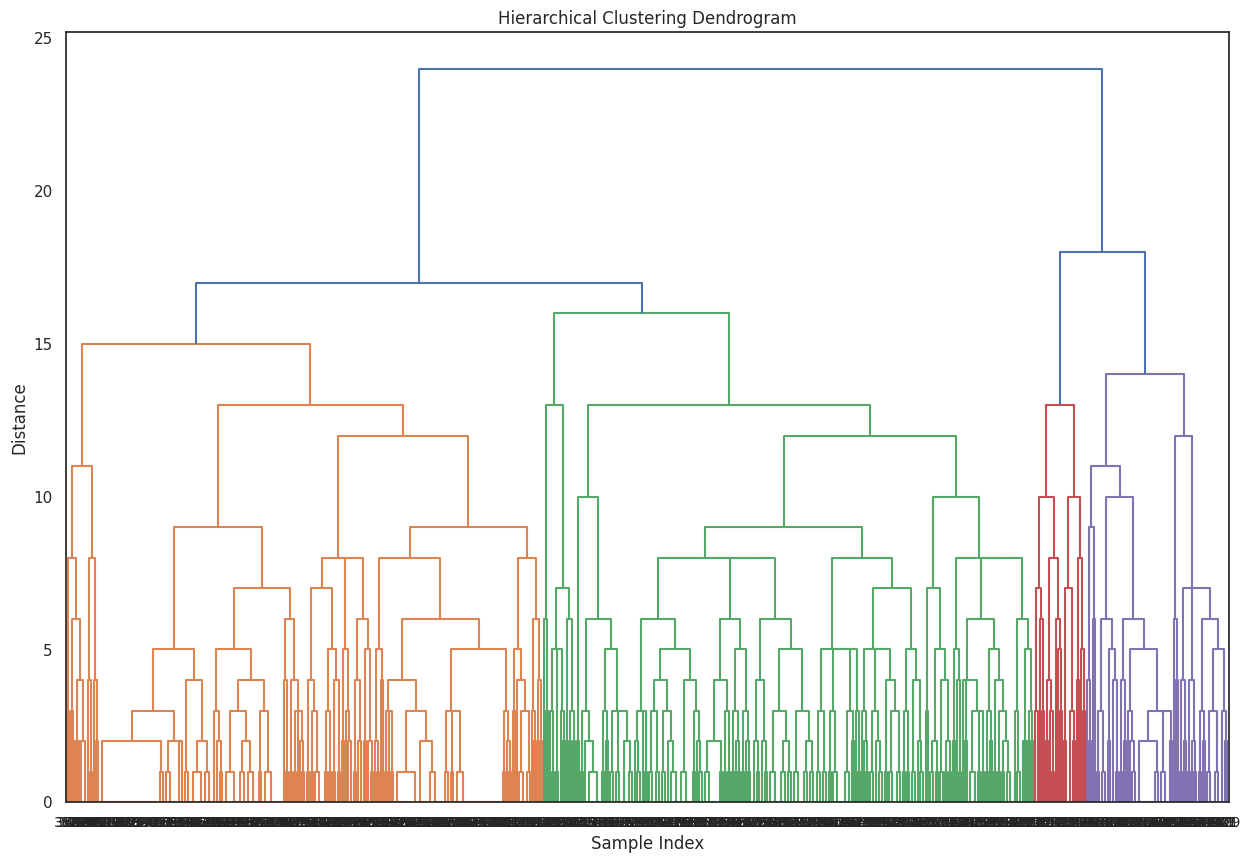

In [178]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
link_matrix = linkage(risk, method='complete', metric='cityblock')  # 'cityblock' corresponds to Manhattan distance
plt.figure(figsize=(15, 10))
dendrogram(link_matrix, labels=risk.index, orientation='top', leaf_rotation=0, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

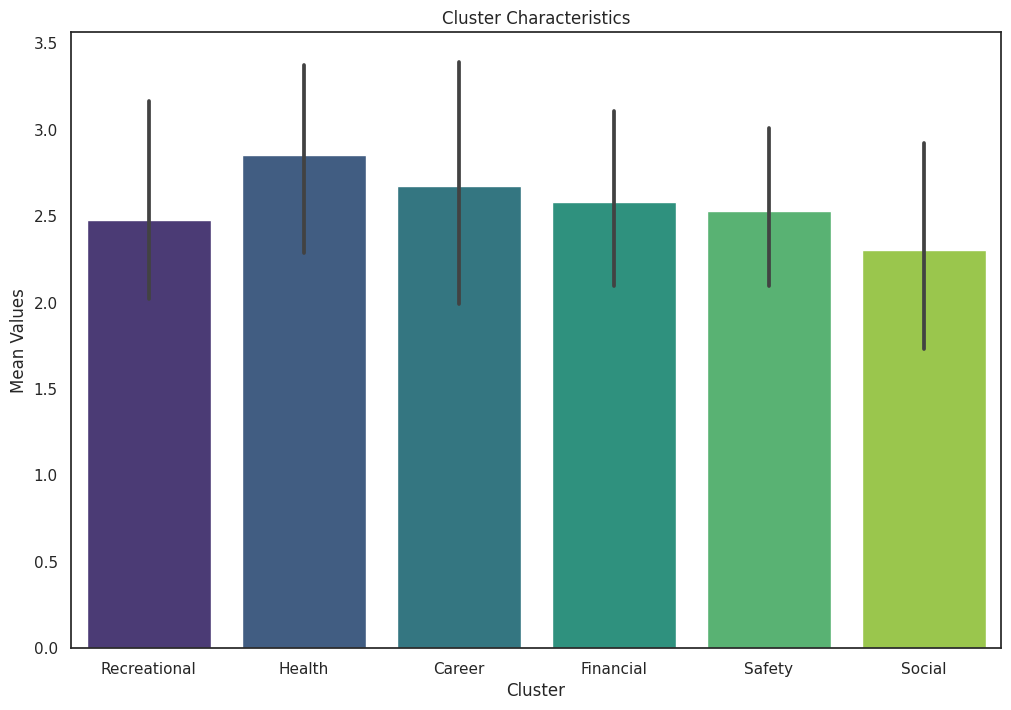

In [179]:
num_clusters = 6
clusters = fcluster(link_matrix, t=num_clusters, criterion='maxclust')
cluster_means = risk.groupby(clusters).mean()
total_means = risk.mean().to_frame().T
total_means.index = [0]
cluster_means = pd.concat([total_means, cluster_means])
plt.figure(figsize=(12, 8))
sns.barplot(data=cluster_means, palette='viridis')
plt.title('Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Mean Values')
plt.show()

Bagged clustering also combines hierarchical clustering algo-
rithms and partitioning clustering algorithms, but adds bootstrapping (Efron and

Tibshirani 1993). Bootstrapping can be implemented by random drawing from the
data set with replacement. That means that the process of extracting segments is
repeated many times with randomly drawn (bootstrapped) samples of the data.
Bootstrapping has the advantage of making the final segmentation solution less
dependent on the exact people contained in consumer data.

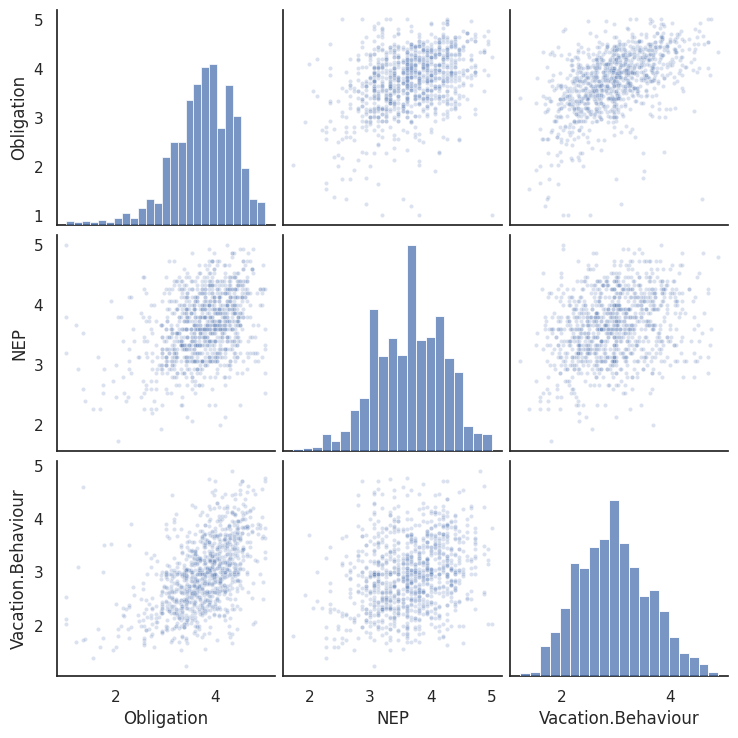

In [180]:
v_data = data[['Obligation', 'NEP', 'Vacation.Behaviour']]
v_data = v_data.dropna()
sns.set(style="white")
sns.pairplot(v_data, markers='.', plot_kws={'alpha':0.2})
plt.show()

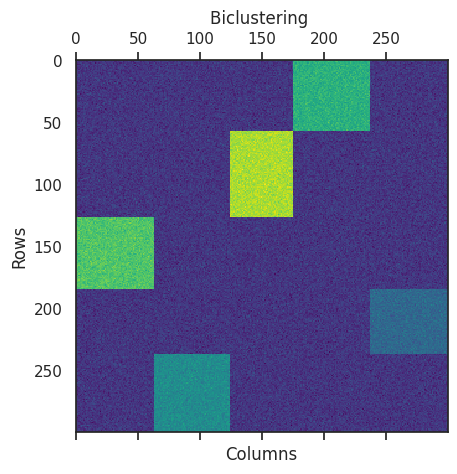

In [181]:
winterActiv_df = pd.read_csv('/content/1997_98_27_activities.csv')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralBiclustering

winterActiv_df, rows, columns = make_biclusters(shape=(300, 300), n_clusters=5, noise=5, random_state=42)

model = SpectralBiclustering(n_clusters=5, method='log', random_state=0)
model.fit(winterActiv_df)

fit_data = winterActiv_df[np.argsort(model.row_labels_), :]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap='viridis')
plt.title('Biclustering ')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [182]:
data2['Gender'] = data2['Gender'].apply(lambda x: 'Female' if x == 0 else 'Male')

<Axes: xlabel='Gender', ylabel='count'>

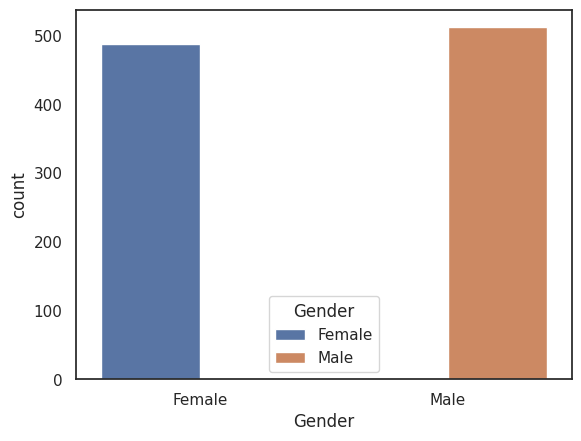

In [183]:
sns.countplot(x=data2['Gender'], hue= data2['Gender'])

<Axes: xlabel='Obligation2', ylabel='count'>

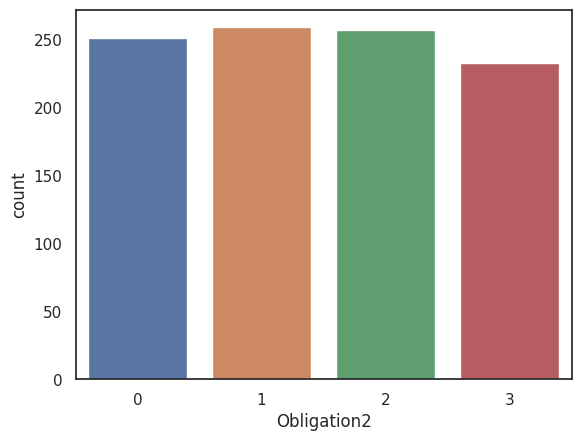

In [184]:
sns.countplot(x=data2['Obligation2'])